In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [4]:

df = pd.read_csv('../../data/testData_jihun4.csv')
df

,Unnamed: 0,Pitch,Roll,Time,Yaw
0,0,71.0,-10.0,14.247,41.0
1,1,71.0,-11.0,16.790,81.0
2,2,72.0,-11.0,16.862,37.0
3,3,71.0,-11.0,16.933,86.0
4,4,72.0,-10.0,17.004,29.0
...,...,...,...,...,...
197,197,59.0,-4.0,30.874,44.0
198,198,65.0,-17.0,30.945,64.0
199,199,67.0,-5.0,31.017,25.0
200,200,66.0,-5.0,31.088,22.0


### Q1,Q3,IQR 값 구하기

In [5]:
q3 = df['Roll'].quantile(0.75) 
q1 = df['Roll'].quantile(0.25)
iqr = q3 - q1
print(q3,q1)

-5.0 -15.0


### 이상치 여부 찾아 새로운 열로 저장

In [6]:
def is_outlier(df):
    roll = df['Roll']
    if roll > q3 + 1.5 * iqr or roll < q1 - 1.5 * iqr:
        return True
    else:
        return False

df['Roll_outlier'] = df.apply(is_outlier, axis = 1) # axis = 1 지정 필수
df

,Unnamed: 0,Pitch,Roll,Time,Yaw,Roll_outlier
0,0,71.0,-10.0,14.247,41.0,False
1,1,71.0,-11.0,16.790,81.0,False
2,2,72.0,-11.0,16.862,37.0,False
3,3,71.0,-11.0,16.933,86.0,False
4,4,72.0,-10.0,17.004,29.0,False
...,...,...,...,...,...,...
197,197,59.0,-4.0,30.874,44.0,False
198,198,65.0,-17.0,30.945,64.0,False
199,199,67.0,-5.0,31.017,25.0,False
200,200,66.0,-5.0,31.088,22.0,False


### 이상치 행 제거

In [7]:
df_trim = df.loc[df['Roll_outlier'] == False]

del df_trim['Roll_outlier']

df_trim

,Unnamed: 0,Pitch,Roll,Time,Yaw
0,0,71.0,-10.0,14.247,41.0
1,1,71.0,-11.0,16.790,81.0
2,2,72.0,-11.0,16.862,37.0
3,3,71.0,-11.0,16.933,86.0
4,4,72.0,-10.0,17.004,29.0
...,...,...,...,...,...
197,197,59.0,-4.0,30.874,44.0
198,198,65.0,-17.0,30.945,64.0
199,199,67.0,-5.0,31.017,25.0
200,200,66.0,-5.0,31.088,22.0


In [8]:
import matplotlib.pyplot as plt

def draw_plot(df, name):
    x = df['Time']
    
    f, axes = plt.subplots(3,1)
    # 격자 크기 설정
    f.set_size_inches((10, 10))
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

    plt.title(name + "'s Gait")

    axes[0].plot(x, df['Roll'])
    axes[0].set_title('Roll')
    
    axes[1].plot(x, df['Pitch'])
    axes[1].set_title('Pitch')

    axes[2].plot(x, df['Yaw'])
    axes[2].set_title('Yaw')

    plt.show()

### 이상치 제거 전

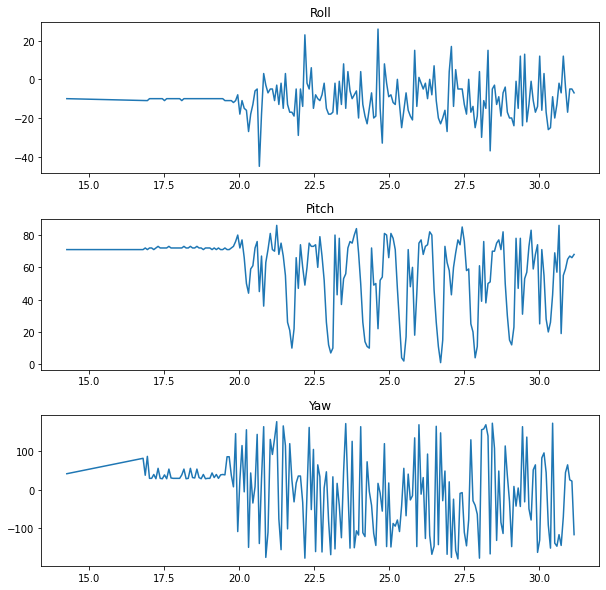

In [9]:
draw_plot(df, "z")

### 이상치 제거 후

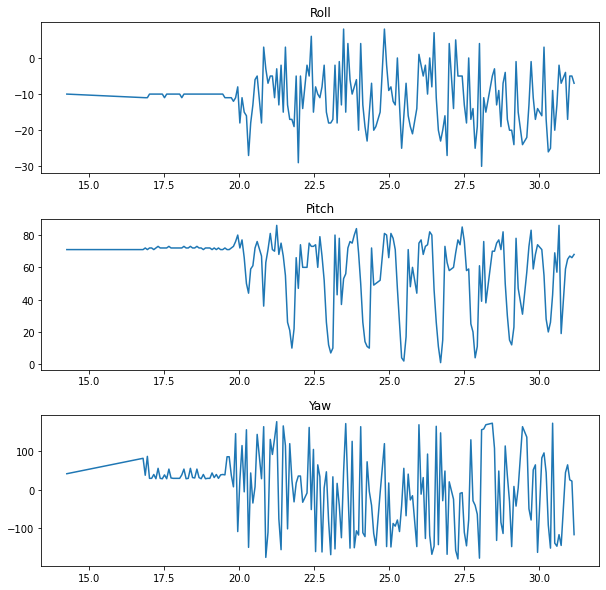

In [10]:
draw_plot(df_trim, "z")

In [45]:
import scipy
from scipy.signal import find_peaks
data = df['Yaw']
time = df['Time']

In [52]:
peaks, properties = scipy.signal.find_peaks(data)

In [53]:
peaks

array([  1,   3,   6,   8,  11,  13,  20,  23,  26,  29,  33,  35,  38,
        40,  44,  47,  49,  51,  54,  57,  60,  63,  66,  69,  73,  78,
        80,  82,  86,  89,  91,  95,  98, 100, 102, 105, 110, 113, 115,
       117, 119, 122, 124, 127, 129, 131, 133, 137, 139, 141, 143, 145,
       149, 153, 160, 163, 166, 169, 173, 175, 177, 179, 183, 187, 191,
       194, 198])

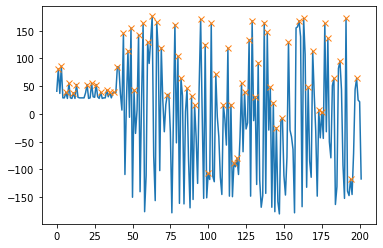

In [54]:
plt.plot(data)
plt.plot(data[peaks],"x")